# Wrangling spike trains!

In [21]:
# here we go

range(21), [0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0]

spikeTrain = [0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0]

lightOnsetTime = 5
spikeValue = 1
latencyToFirstSpike = spikeTrain[lightOnsetTime:].index(spikeValue)
print(latencyToFirstSpike)

#i,x in enumerate(spikeTrain) means:
#we cycle through each element x in spikeTrain, and i refers to its location or index

spikeTimes = [i for i,x in enumerate(spikeTrain) if x==1]
print(spikeTimes)

4
[9, 11, 13, 17]


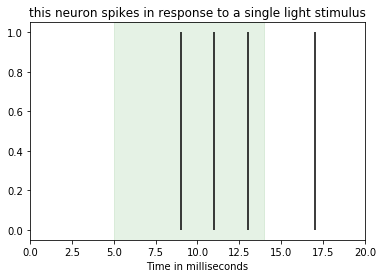

In [26]:
# plot single trial stuff

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
plt.vlines(spikeTimes,0,1)
plt.axvspan(5,14,alpha=0.1,color='g')
plt.xlim([0,20])
plt.title('this neuron spikes in response to a single light stimulus')
plt.xlabel('Time in milliseconds')
plt.show(block=False)

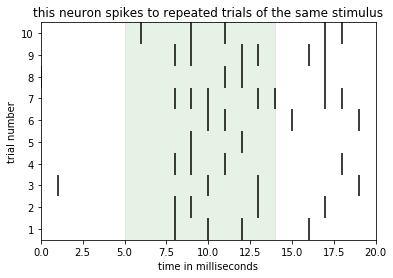

In [42]:
# multiple trials!

tenSpikeTrains=[[0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0],
                [0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0],
                [0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0],
                [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0],
                [0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0]]

fig = plt.figure()
ax = plt.subplot(1,1,1)

for trial in range(len(tenSpikeTrains)):
    spikeTimes = [i for i,x in enumerate(tenSpikeTrains[trial]) if x==1]
    plt.vlines(spikeTimes,trial,trial+1)
plt.axvspan(5,14,alpha=0.1,color='g')
plt.xlim([0,20])
plt.ylim([0,10])
plt.title('this neuron spikes to repeated trials of the same stimulus')
plt.xlabel('time in milliseconds')
plt.ylabel('trial number')
plt.yticks([x+0.5 for x in range(10)],[str(x+1) for x in range(10)])
plt.show()


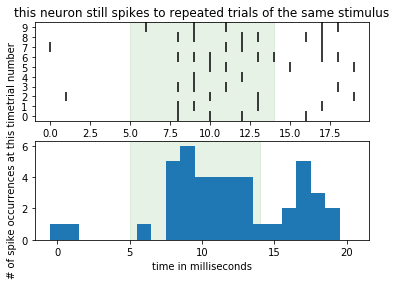

In [45]:
# make PSTH

import numpy as np

fig=plt.figure()
ax=plt.subplot(2,1,1)
for trial in range(len(tenSpikeTrains)):
    spikeTimes=[i for i,x in enumerate(tenSpikeTrains[trial]) if x==1]
    plt.vlines(spikeTimes,trial,trial+1)
plt.axvspan(5,14,alpha=0.1,color='g')
plt.ylim([0,10])
plt.title('this neuron still spikes to repeated trials of the same stimulus')
plt.xlabel('time in milliseconds')
plt.ylabel('trial number')
plt.yticks([x+0.5 for x in range(10)],[str(x) for x in range(10)])

ax=plt.subplot(2,1,2)
plt.axvspan(5,14,alpha=0.1,color='g')
ax.bar(range(21),np.sum(tenSpikeTrains,0),1)
plt.xlabel('time in milliseconds')
plt.ylabel('# of spike occurrences at this time')
plt.savefig('Figure with subplots of rasters and PSTH.png')
plt.show()

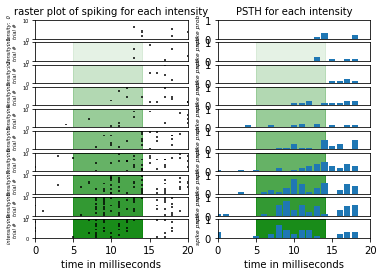

In [105]:
# different intensities

# load a "pickle" file
import pickle
#with open('tenIntensities.pkl','rb') as handle:
tenIntensities = pickle.load(open('tenIntensities.pkl','rb'),encoding='latin1')

#make figure now
fig = plt.figure()
numIntensities = len(tenIntensities)
nbar={}

#print(tenIntensities.keys())
for key in tenIntensities.keys():
    #print(key[0])
    ax = plt.subplot(numIntensities,2,float(key[0])*2+1)
    for trial in range(10): #this hard codes that there are 10 trials per stimulus intensity
        plt.vlines(tenIntensities[key][trial],trial,trial+1)
    plt.xlim([0,20])
    plt.ylim([0,10])
    plt.ylabel('intensity:  '+str(key[0])+'\ntrial # ',style='italic',fontsize=5)
    plt.yticks(fontsize=5)
    plt.axvspan(5,14,alpha=0.1*float(key[0]),color='g')
    if float(key[0])<9:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel('time in milliseconds')
    if float(key[0])==0:
        plt.title('raster plot of spiking for each intensity',fontsize=10)
    ax=plt.subplot(numIntensities,2,float(key[0])*2+2)
    plt.axvspan(5,14,alpha=0.1*float(key[0]),color='g')
    spikeTimes = [a for b in tenIntensities[key] for a in b]
    nOut,bins=np.histogram(spikeTimes,bins=range(20))
    #print(nOut)
    nbar[int(key[0])]=nOut/10.
    #print(nbar[float(key[0])])
    plt.bar(bins[:-1],nOut/10.)
    plt.xlim([0,20])
    plt.ylim([0,1])
    plt.ylabel('spike prob',style='italic',fontsize=6)
    if float(key[0])==0:
        plt.title('PSTH for each intensity',fontsize=10)
    if float(key[0])<numIntensities-1:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel('time in milliseconds')
    
    #print(nbar)
    
plt.savefig('Figure subplot intensity rasters and psths.png')
plt.show()


Text(0,0.5,'mean spikes per time bin')

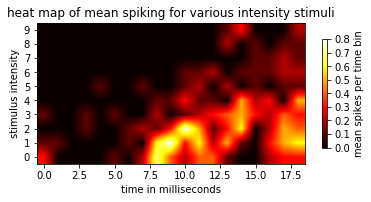

In [129]:
# heat map

#print(nbar.keys())

nbar_sort={};

for key in sorted(nbar.keys()):
    #print(key)
    nbar_sort[key]=nbar[key]
    #print(nbar[key])
    
fig=plt.figure()
ax=plt.subplot(111)
aa=ax.imshow(nbar_sort.values(),cmap='hot',interpolation='bilinear')

plt.yticks([x for x in range(10)],[str(x) for x in range(10)[::-1]])
plt.ylabel('stimulus intensity')
plt.xlabel('time in milliseconds')
plt.title('heat map of mean spiking for various intensity stimuli')
cb=fig.colorbar(aa,shrink=0.5)
cb.ax.set_ylabel('mean spikes per time bin')




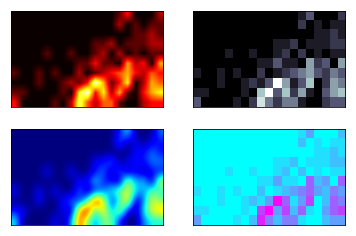

In [130]:
# multiple heat map types

fig=plt.figure() 
ax=plt.subplot(221)
aa=ax.imshow(nbar_sort.values(),cmap='hot',interpolation='bilinear',aspect=1.2)
plt.yticks([]); plt.xticks([])
ax = plt.subplot(222)
aa = ax.imshow(nbar_sort.values(),cmap='bone',interpolation='nearest',aspect=1.2)
plt.yticks([]); plt.xticks([])
ax = plt.subplot(223)
aa = ax.imshow(nbar_sort.values(),cmap='jet',interpolation='bicubic',aspect=1.2)
plt.yticks([]); plt.xticks([])
ax = plt.subplot(224)
aa = ax.imshow(nbar_sort.values(),cmap='cool',interpolation='nearest',aspect=1.2)
plt.yticks([]); plt.xticks([])
plt.savefig('Figure 3.11 4 heatmaps no labels.png')
plt.show()
